## Preprocessing

In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# # Models - Not needed for this notebook
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# Tensorflow
import tensorflow as tf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Read the charity_data.csv.

df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
print(df.shape)
df.head()

(34299, 12)


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [4]:
# Save the 'NAME' column in a variable called 'name' to save it for later
name = df['NAME']

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df.drop(columns=['EIN', 'NAME'], inplace=True)

In [5]:
# Determine the number of unique values in each column.
for column in df.columns:
    print(f"Column {column} has {df[column].nunique()} unique values")
    print(df[column].value_counts())
    print("----------------------------------------")

Column APPLICATION_TYPE has 17 unique values
APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64
----------------------------------------
Column AFFILIATION has 6 unique values
AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64
----------------------------------------
Column CLASSIFICATION has 71 unique values
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64
----------------------------------------
Column USE_CASE has 5 unique values
USE_CASE
Preservation     28095
Produc

In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 1000
application_type_counts = df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = application_type_counts.loc[application_type_counts < threshold].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df['CLASSIFICATION'].value_counts()[df['CLASSIFICATION'].value_counts() > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
threshold = 500
classification_counts = df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_counts.loc[classification_counts < threshold].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: count, dtype: int64

In [11]:
df["AFFILIATION"].value_counts()

AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64

In [12]:
# Bucket 'AFFILIATION' column
threshold = 100
affiliation_counts = df['AFFILIATION'].value_counts()
affiliations_to_replace = affiliation_counts.loc[affiliation_counts < threshold].index.tolist()

# Replace in dataframe
for aff in affiliations_to_replace:
    df['AFFILIATION'] = df['AFFILIATION'].replace(aff,"Other")

# Check to make sure replacement was successful
df['AFFILIATION'].value_counts()

AFFILIATION
Independent         18480
CompanySponsored    15705
Other                 114
Name: count, dtype: int64

In [13]:
df["ORGANIZATION"].value_counts()

ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: count, dtype: int64

In [14]:
# Bucket 'ORGANIZATION' column
threshold = 500
organization_counts = df['ORGANIZATION'].value_counts()
organizations_to_replace = organization_counts.loc[organization_counts < threshold].index.tolist()

# Replace in dataframe
for org in organizations_to_replace:
    df['ORGANIZATION'] = df['ORGANIZATION'].replace(org,"Other")

# Check to make sure replacement was successful
df['ORGANIZATION'].value_counts()

ORGANIZATION
Trust          23515
Association    10255
Other            529
Name: count, dtype: int64

In [15]:
df["USE_CASE"].value_counts()

USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

In [16]:
# Bucket 'USE_CASE' column
threshold = 500
use_case_counts = df['USE_CASE'].value_counts()
use_cases_to_replace = use_case_counts.loc[use_case_counts < threshold].index.tolist()

# Replace in dataframe
for use_case in use_cases_to_replace:
    df['USE_CASE'] = df['USE_CASE'].replace(use_case,"Other")

# Check to make sure replacement was successful
df['USE_CASE'].value_counts()

USE_CASE
Preservation    28095
ProductDev       5671
Other             533
Name: count, dtype: int64

In [17]:
df["SPECIAL_CONSIDERATIONS"].value_counts()

SPECIAL_CONSIDERATIONS
N    34272
Y       27
Name: count, dtype: int64

In [18]:
df["STATUS"].value_counts()

STATUS
1    34294
0        5
Name: count, dtype: int64

In [19]:
# Drop the non-beneficial columns, 'SPECIAL_CONSIDERATIONS' and 'STATUS'
#     These columns are not useful for our purposes and have no real value
#     especially with the imbalance. Therefore, we can drop them.
df.drop(columns=['SPECIAL_CONSIDERATIONS', 'STATUS'], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34299 non-null  object
 1   AFFILIATION       34299 non-null  object
 2   CLASSIFICATION    34299 non-null  object
 3   USE_CASE          34299 non-null  object
 4   ORGANIZATION      34299 non-null  object
 5   INCOME_AMT        34299 non-null  object
 6   ASK_AMT           34299 non-null  int64 
 7   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.1+ MB


In [21]:
# Convert categorical data to numeric with `pd.get_dummies`
dummied_df = pd.get_dummies(df, dtype=int)
print(dummied_df.shape)
dummied_df.head()

(34299, 33)


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
1,108590,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,5000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,6692,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,142590,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [22]:
# Scale the 'ASK_AMT' column since the rest of the columns are binary
#    (taken from "https://www.geeksforgeeks.org/normalize-a-column-in-pandas/")
dummied_df["ASK_AMT"] = MinMaxScaler().fit_transform(np.array(dummied_df["ASK_AMT"]).reshape(-1, 1))

dummied_df["ASK_AMT"].describe()

count    3.429900e+04
mean     3.215006e-04
std      1.013404e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.189187e-07
max      1.000000e+00
Name: ASK_AMT, dtype: float64

In [23]:
dummied_df["IS_SUCCESSFUL"].value_counts()

IS_SUCCESSFUL
1    18261
0    16038
Name: count, dtype: int64

In [24]:
# Split our preprocessed data into our features and target arrays
X = dummied_df.drop(columns=['IS_SUCCESSFUL'])
y = dummied_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Balanced, so no need to stratify

## Compile, Train and Evaluate the Model

In [25]:
# Function for model evaluation
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):

    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_proba = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_proba = nn_model.predict(X_test)

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = X_train.shape[1]

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(units=75, activation="relu", input_dim=num_input_features))

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=50, activation="relu"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

2024-09-15 16:32:04.171895: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-09-15 16:32:04.171961: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-09-15 16:32:04.171971: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-09-15 16:32:04.172267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-15 16:32:04.172283: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 75)             │         2,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,326 (24.71 KB)

 Trainable params: 6,326 (24.71 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
fit_nn1 = nn1.fit(X_train, y_train, epochs=20)

Epoch 1/20


2024-09-15 16:32:04.814521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


804/804 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7002 - loss: 0.5937
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7310 - loss: 0.5568
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7253 - loss: 0.5558
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7227 - loss: 0.5582
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7303 - loss: 0.5509
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7339 - loss: 0.5462
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7366 - loss: 0.5449
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7320 - loss: 0.5496
Epoch 9/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7288 - loss: 0.5503
Epoch 10/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7299 - loss: 0.5513
Epoch 11/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7335 - loss: 0.5472
Epoch 12/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accur

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 4ms/step - accuracy: 0.7310 - loss: 0.5541
Loss: 0.5541450381278992, Accuracy: 0.7309620976448059


804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
TRAIN METRICS
    Confusion Matrix:
    [[ 7992  4053]
 [ 2699 10980]]

    AUC: 0.7933489751419845

    Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.66      0.70     12045
           1       0.73      0.80      0.76     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.73      0.73     25724
weighted avg       0.74      0.74      0.74     25724

    
TEST METRICS
    Confusion Matrix:
    [[2620 1373]
 [ 934 3648]]

    AUC: 0.7813154414813439

    Classification Report:
                  precision    recall  f1-score   support

           0       0.74      0.66      0.69      3993
           1       0.73      0.80      0.76      4582

    accuracy                           0.73      8575
   macro avg       

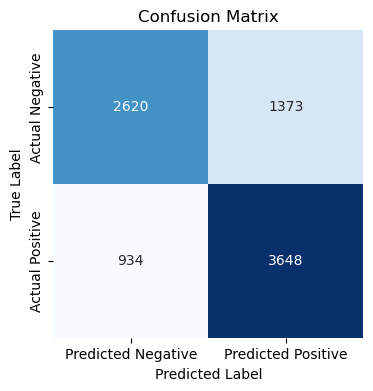

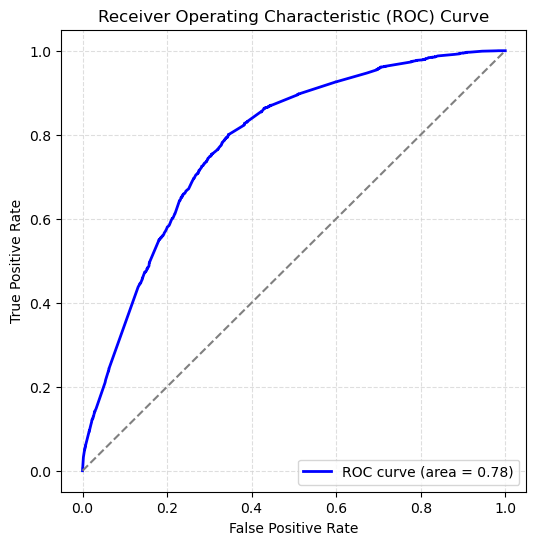

In [30]:
doClassification_NN(nn1, X_train, X_test, y_train, y_test)

In [31]:
# Export our model to HDF5 file
nn1.save("../models/AlphabetSoupNNModel1.h5")

## Try Different Models

#### Add 3rd Hidden Layer and train for more epochs

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = X_train.shape[1]

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=75, activation="relu", input_dim=num_input_features))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=50, activation="relu"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=25, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 75)             │         2,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,576 (29.59 KB)

 Trainable params: 7,576 (29.59 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
fit_nn2 = nn2.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7025 - loss: 0.5965
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7278 - loss: 0.5570
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7311 - loss: 0.5522
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7348 - loss: 0.5459
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7298 - loss: 0.5526
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7333 - loss: 0.5479
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7305 - loss: 0.5517
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7343 - loss: 0.5455
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7333 - loss: 0.5498
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7311 - loss: 0.5479
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7367 - loss: 0.5460
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 4ms/step - accuracy: 0.7324 - loss: 0.5824
Loss: 0.5823654532432556, Accuracy: 0.7323614954948425


804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAIN METRICS
    Confusion Matrix:
    [[ 8010  4035]
 [ 2642 11037]]

    AUC: 0.7988830994815571

    Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.67      0.71     12045
           1       0.73      0.81      0.77     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    
TEST METRICS
    Confusion Matrix:
    [[2620 1373]
 [ 922 3660]]

    AUC: 0.7798066629696688

    Classification Report:
                  precision    recall  f1-score   support

           0       0.74      0.66      0.70      3993
           1       0.73      0.80      0.76      4582

    accuracy                           0.73      8575
   macro avg       0.73    

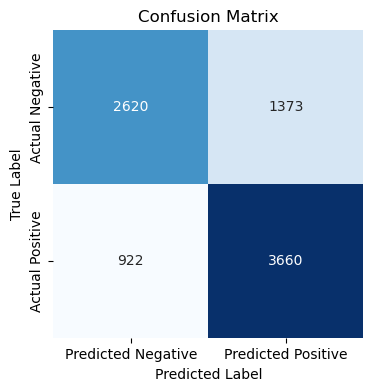

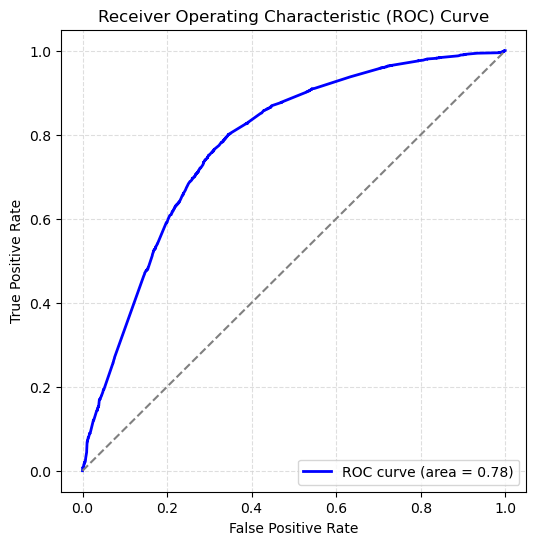

In [36]:
doClassification_NN(nn2, X_train, X_test, y_train, y_test)

In [37]:
# Export our model to HDF5 file
nn2.save("../models/AlphabetSoupNNModel2.h5")

Model 2 performs about as well as model 1. It has more false negatives than model 1, but fewer false positives with the same accuracy.

#### Change activation function to tanh

In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = X_train.shape[1]

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=75, activation="tanh", input_dim=num_input_features))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=50, activation="tanh"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=25, activation="tanh"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 75)             │         2,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,576 (29.59 KB)

 Trainable params: 7,576 (29.59 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Train the model
fit_nn3 = nn3.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7036 - loss: 0.5951
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7199 - loss: 0.5664
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7235 - loss: 0.5629
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7306 - loss: 0.5533
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7236 - loss: 0.5588
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7297 - loss: 0.5541
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7302 - loss: 0.5530
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7326 - loss: 0.5498
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7300 - loss: 0.5513
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7296 - loss: 0.5495
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7291 - loss: 0.5513
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 4ms/step - accuracy: 0.7271 - loss: 0.5569
Loss: 0.5569356083869934, Accuracy: 0.7271137237548828


804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
TRAIN METRICS
    Confusion Matrix:
    [[ 8343  3702]
 [ 3021 10658]]

    AUC: 0.7978108811745414

    Classification Report:
                  precision    recall  f1-score   support

           0       0.73      0.69      0.71     12045
           1       0.74      0.78      0.76     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    
TEST METRICS
    Confusion Matrix:
    [[2718 1275]
 [1065 3517]]

    AUC: 0.7798755307602359

    Classification Report:
                  precision    recall  f1-score   support

           0       0.72      0.68      0.70      3993
           1       0.73      0.77      0.75      4582

    accuracy                           0.73      8575
   macro avg       0.73

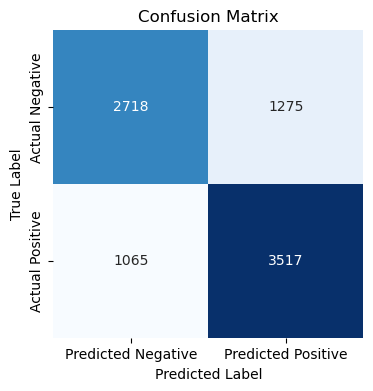

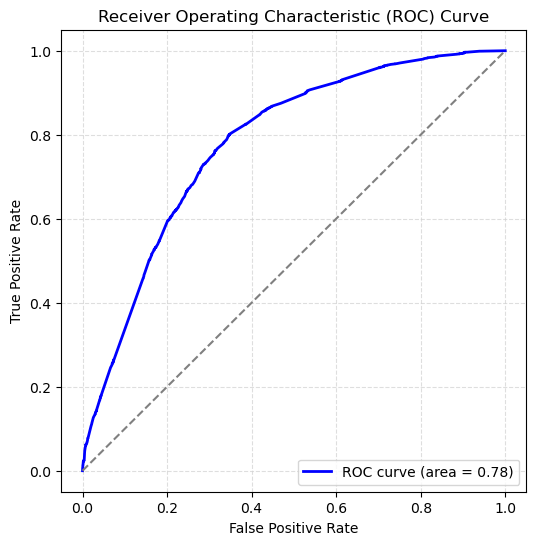

In [42]:
doClassification_NN(nn3, X_train, X_test, y_train, y_test)

In [43]:
# Export our model to HDF5 file
nn3.save("../models/AlphabetSoupNNModel3.h5")

This model performs worse than model 2. It has more false positives than model 1, but fewer false negatives with the same accuracy.

#### Change back to relu and increase number of layers

In [44]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = X_train.shape[1]

nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=num_input_features))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=75, activation="relu"))

# Third hidden layer
nn4.add(tf.keras.layers.Dense(units=50, activation="relu"))

# Fourth hidden layer
nn4.add(tf.keras.layers.Dense(units=25, activation="relu"))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 100)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,976 (62.41 KB)

 Trainable params: 15,976 (62.41 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Compile the model
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# Train the model
fit_nn4 = nn4.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7056 - loss: 0.5909
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7172 - loss: 0.5641
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7320 - loss: 0.5525
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7318 - loss: 0.5521
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7314 - loss: 0.5497
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7356 - loss: 0.5470
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7334 - loss: 0.5475
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7322 - loss: 0.5481
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7351 - loss: 0.5462
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7323 - loss: 0.5468
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7369 - loss: 0.5445
Epoch 12/100
804/804 ━━━━━━━━

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 4ms/step - accuracy: 0.7319 - loss: 0.5955
Loss: 0.5954626798629761, Accuracy: 0.7318950295448303


804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAIN METRICS
    Confusion Matrix:
    [[ 8023  4022]
 [ 2653 11026]]

    AUC: 0.7995786568212855

    Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.67      0.71     12045
           1       0.73      0.81      0.77     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    
TEST METRICS
    Confusion Matrix:
    [[2617 1376]
 [ 923 3659]]

    AUC: 0.7782412325017056

    Classification Report:
                  precision    recall  f1-score   support

           0       0.74      0.66      0.69      3993
           1       0.73      0.80      0.76      4582

    accuracy                           0.73      8575
   macro avg       0.73    

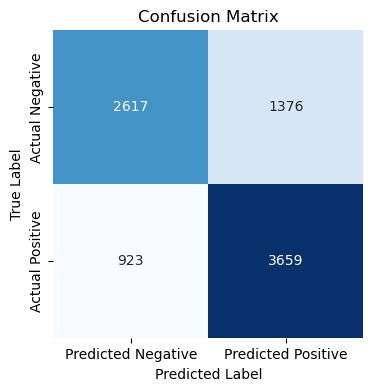

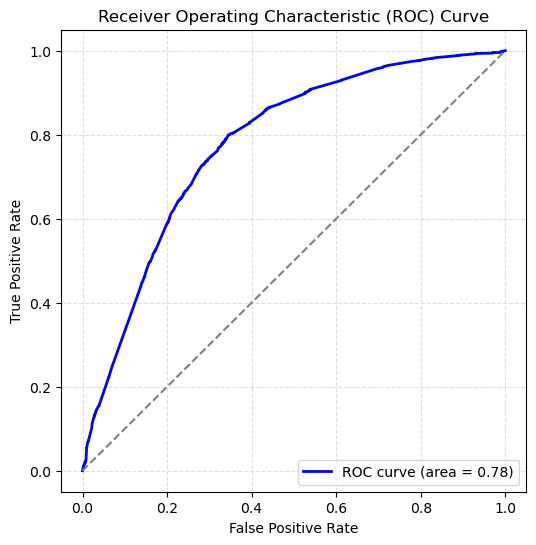

In [48]:
doClassification_NN(nn4, X_train, X_test, y_train, y_test)

In [49]:
# Export our model to HDF5 file
nn4.save("../models/AlphabetSoupNNModel4.h5")

This model ended up being overfit and did not perform as well as model 3. The first model is probably the best of the NN models.

##### Export dataframe to CSV to use in supervised learning

In [50]:
dummied_df.to_csv("../data/processed/preprocessed.csv", index=False)